In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(CSOmapR)
    library(scater)
    library(logger)
    library(ComplexHeatmap)
    library(ggraph)
    library(tidygraph)

})

In [2]:
csomap_all <- readr::read_rds("./out/signif_results_CSOmap.rds")
csomap_pert <- readr::read_rds("./out/CAF_pertubeTIMP1_CSOmap.rds")

In [37]:
plotDF <- bind_rows(reshape2::melt(csomap_pert$qvalue) %>% filter(Var1 == "Hepatocytes")  %>% mutate(group = "PertTIMP1"),
        reshape2::melt(csomap_all$qvalue) %>% filter(Var1 == "Hepatocytes") %>% mutate(group = "Original"))
    

In [38]:
head(plotDF)

,Var1,Var2,value,group
,<fct>,<fct>,<dbl>,<chr>
1,Hepatocytes,CD16- NK,3.708511e-03,PertTIMP1
2,Hepatocytes,CD1c+ Dendritic Cell,2.186493e-12,PertTIMP1
3,Hepatocytes,CLEC9A+/LAMP3+ Dendritic Cell,1.000000e+00,PertTIMP1
4,Hepatocytes,Endothelial,1.000000e+00,PertTIMP1
5,Hepatocytes,Hepatocytes,4.255032e-11,PertTIMP1
6,Hepatocytes,Liver bi-potent/Cholangiocytes,1.000000e+00,PertTIMP1


Saving 6.67 x 5 in image



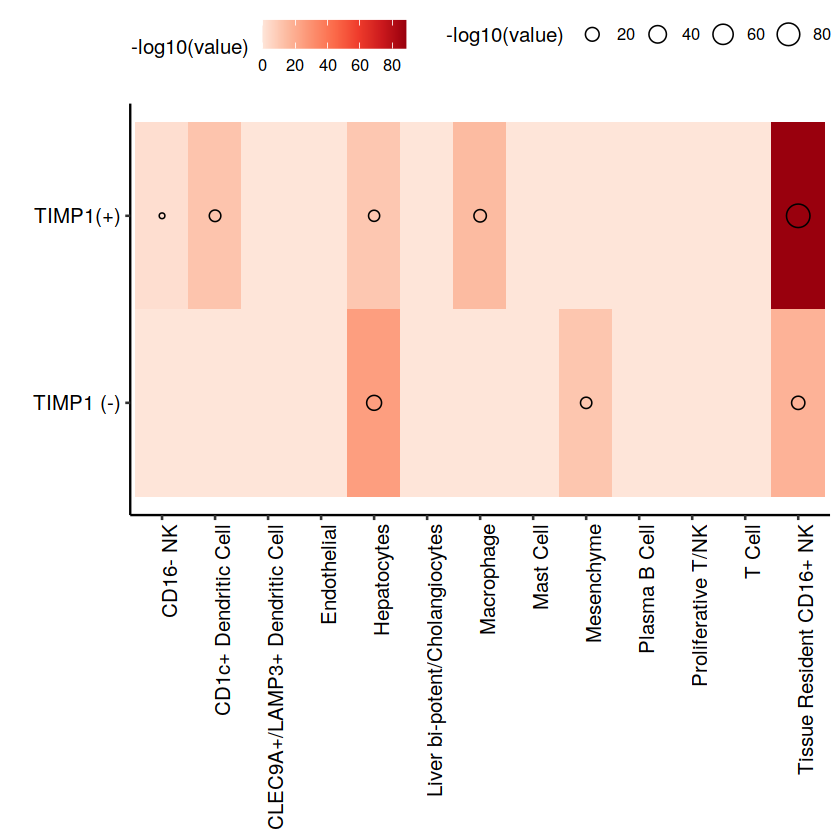

In [56]:
p <- ggplot(plotDF, aes(y = group, x = Var2, fill = -log10(value))) +
    geom_tile() +
    geom_point(data = plotDF %>% filter(value < 0.01), fill = NA, aes(size = -log10(value)), shape = 21) +
    scale_fill_distiller(palette = "Reds", direction = 1) + ylab("") +
    scale_y_discrete(label = c('TIMP1 (-)', 'TIMP1(+)')) +
 ggpubr::theme_pubr(x.text.angle = 90) + theme( axis.title.x = element_blank()) 
p 
ggsave(p, filename = "../figures/Figure2/2D_dotplot_pertTIMP1.pdf", height =5)

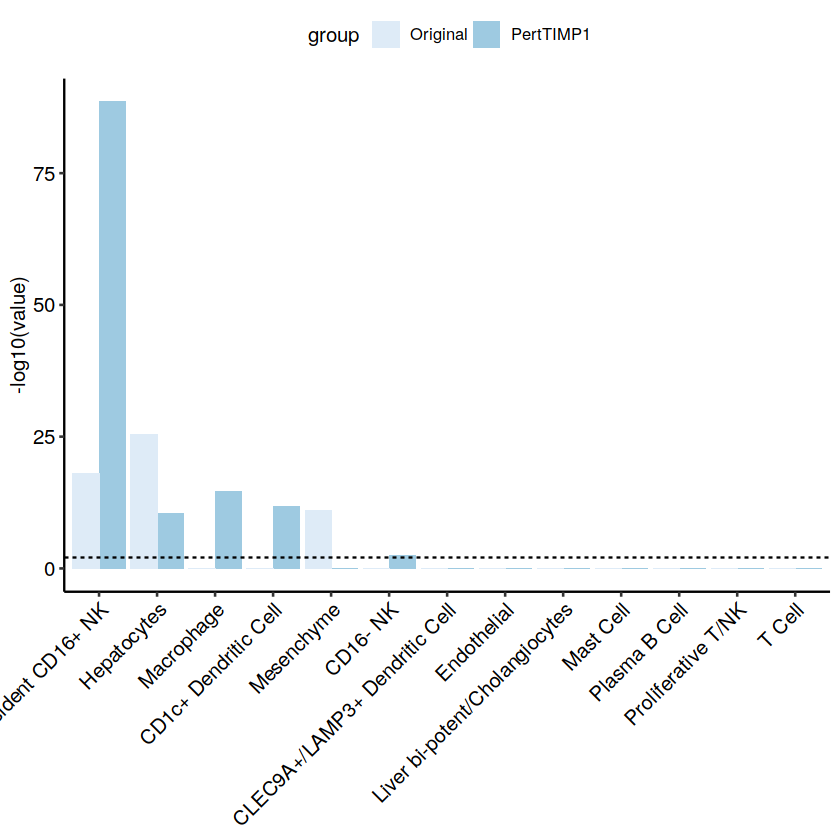

In [39]:
ggplot(plotDF, aes(x = reorder(Var2,value), y = -log10(value))) +
        geom_bar(stat = 'identity', aes(fill = group), position =  'dodge') +
        geom_hline(aes(yintercept = -log10(0.01)), linetype = 2) + 
        scale_fill_brewer(palette = "Blues") + 
        #facet_grid(. ~ Var2) + 
        ggpubr::theme_pubr(x.text.angle = 45) + theme( axis.title.x = element_blank())